In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test = pd.read_csv( 'titanic/test.csv' )
train = pd.read_csv( 'titanic/train.csv' )

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
y = train['Survived'] 

In [6]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [7]:
train_X = train.drop( ['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1 )



In [8]:
train_X['test'] = False

In [9]:
test_X = test.drop( [ 'Name','Ticket','Cabin','Embarked'], axis=1)

In [10]:
test_X['test'] = True

In [11]:
train_X.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,test
0,1,3,male,22.0,1,0,7.2500,False
1,2,1,female,38.0,1,0,71.2833,False
2,3,3,female,26.0,0,0,7.9250,False
3,4,1,female,35.0,1,0,53.1000,False
4,5,3,male,35.0,0,0,8.0500,False


In [12]:
test_X.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,test
0,892,3,male,34.5,0,0,7.8292,True
1,893,3,female,47.0,1,0,7.0000,True
2,894,2,male,62.0,0,0,9.6875,True
3,895,3,male,27.0,0,0,8.6625,True
4,896,3,female,22.0,1,1,12.2875,True


In [13]:
X = pd.concat([train_X, test_X])

In [14]:
X.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,test
413,1305,3,male,NaN,0,0,8.0500,True
414,1306,1,female,39.0,0,0,108.9000,True
415,1307,3,male,38.5,0,0,7.2500,True
416,1308,3,male,NaN,0,0,8.0500,True
417,1309,3,male,NaN,1,1,22.3583,True


In [15]:
X.shape

(1309, 8)

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1308 non-null float64
test           1309 non-null bool
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 83.1+ KB


In [17]:
X.Age.fillna( X['Age'].median(), inplace=True )
X.Parch.fillna( 0, inplace=True )
X.Fare.fillna( X.Fare.median(), inplace=True )

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1309 non-null float64
test           1309 non-null bool
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 83.1+ KB


In [19]:
train['ageGroup'] = 0
train['ageGroup'] = train['Age'].apply(lambda x: 'Child' if (x<15) else "Adult" )

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
X = pd.get_dummies(X)

In [22]:
X.head(10)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,test,Sex_female,Sex_male
0,1,3,22.0,1,0,7.2500,False,0,1
1,2,1,38.0,1,0,71.2833,False,1,0
2,3,3,26.0,0,0,7.9250,False,1,0
3,4,1,35.0,1,0,53.1000,False,1,0
4,5,3,35.0,0,0,8.0500,False,0,1
5,6,3,28.0,0,0,8.4583,False,0,1
6,7,1,54.0,0,0,51.8625,False,0,1
7,8,3,2.0,3,1,21.0750,False,0,1
8,9,3,27.0,0,2,11.1333,False,1,0
9,10,2,14.0,1,0,30.0708,False,1,0


In [23]:
X['Relatives'] = (X.SibSp + X.Parch).astype(bool)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1309 non-null float64
test           1309 non-null bool
Sex_female     1309 non-null uint8
Sex_male       1309 non-null uint8
Relatives      1309 non-null bool
dtypes: bool(2), float64(2), int64(4), uint8(2)
memory usage: 76.7 KB


In [25]:
X_train_prep = X[X.test == False].drop(['test'], axis=1)

In [26]:
X_test_prep = X[X.test == True].drop(['test'], axis=1)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [28]:
grid = {'max_depth':[1,3,5,10,15],
       'min_samples_leaf':[1,5,10,30, 70, 50,100]}


gridsearch = GridSearchCV(DecisionTreeClassifier(),
                          grid,
                          cv=5,
                         scoring='neg_log_loss')

In [29]:
gridsearch.fit(X_train_prep, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 10, 15], 'min_samples_leaf': [1, 5, 10, 30, 70, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_log_loss', verbose=0)

In [30]:
from pprint import pprint

pprint(gridsearch.cv_results_)

{'mean_fit_time': array([ 0.00560026,  0.0030026 ,  0.00220165,  0.00200148,  0.00260038,
        0.00300031,  0.00220585,  0.00260191,  0.00240173,  0.00260215,
        0.00240192,  0.00260186,  0.00280204,  0.00240488,  0.00280218,
        0.0029983 ,  0.00300217,  0.00260191,  0.00220151,  0.00260177,
        0.00260186,  0.00320153,  0.00320182,  0.00320172,  0.00240164,
        0.00200143,  0.00280018,  0.00240149,  0.00400147,  0.00360193,
        0.00300183,  0.0022018 ,  0.00240192,  0.00280199,  0.00240197]),
 'mean_score_time': array([ 0.00260162,  0.00100036,  0.00100069,  0.0010006 ,  0.00140095,
        0.00120072,  0.00120063,  0.00100055,  0.00120063,  0.00140071,
        0.00140018,  0.00100031,  0.00100074,  0.00120049,  0.00120063,
        0.00140123,  0.0010005 ,  0.00100045,  0.00100069,  0.00120087,
        0.00100069,  0.00100117,  0.00120115,  0.00100131,  0.00120077,
        0.0010006 ,  0.00100074,  0.00100069,  0.00100174,  0.0012012 ,
        0.00100055,  0.0

In [31]:
sorted(gridsearch.grid_scores_, key = lambda x: -x.mean_validation_score)

C:\Users\Slava-N\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -0.45002, std: 0.02961, params: {'max_depth': 3, 'min_samples_leaf': 30},
 mean: -0.45166, std: 0.02926, params: {'max_depth': 3, 'min_samples_leaf': 70},
 mean: -0.45258, std: 0.02940, params: {'max_depth': 5, 'min_samples_leaf': 70},
 mean: -0.45258, std: 0.02940, params: {'max_depth': 10, 'min_samples_leaf': 70},
 mean: -0.45258, std: 0.02940, params: {'max_depth': 15, 'min_samples_leaf': 70},
 mean: -0.45497, std: 0.02302, params: {'max_depth': 3, 'min_samples_leaf': 50},
 mean: -0.45691, std: 0.02685, params: {'max_depth': 5, 'min_samples_leaf': 100},
 mean: -0.45691, std: 0.02685, params: {'max_depth': 10, 'min_samples_leaf': 100},
 mean: -0.45691, std: 0.02685, params: {'max_depth': 15, 'min_samples_leaf': 100},
 mean: -0.45701, std: 0.02674, params: {'max_depth': 3, 'min_samples_leaf': 100},
 mean: -0.45988, std: 0.02502, params: {'max_depth': 5, 'min_samples_leaf': 50},
 mean: -0.45988, std: 0.02502, params: {'max_depth': 10, 'min_samples_leaf': 50},
 mean: -0.45988, st

In [95]:
model = DecisionTreeClassifier( max_depth=3, min_samples_leaf=30 )

In [96]:
model.fit(X_train_prep, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=30,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [97]:
X_test_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Sex_female     418 non-null uint8
Sex_male       418 non-null uint8
Relatives      418 non-null bool
dtypes: bool(1), float64(2), int64(4), uint8(2)
memory usage: 24.1 KB


In [98]:
model.feature_importances_

array([ 0.        ,  0.16715275,  0.06081122,  0.        ,  0.        ,
        0.10463834,  0.        ,  0.6673977 ,  0.        ])

([<matplotlib.axis.YTick at 0x2bd3949a2b0>,
 <a list of 9 Text yticklabel objects>)

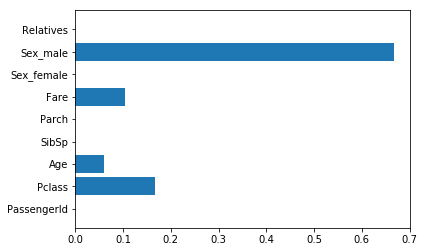

In [99]:
plt.barh(np.arange(len(model.feature_importances_)), model.feature_importances_)
plt.yticks(np.arange(len(X_train_prep.columns)),X_train_prep.columns)

In [100]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='tree.dot',filled=True, feature_names=X_train_prep.columns)                


In [101]:
X_train_prep.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Relatives
0,1,3,22.0,1,0,7.2500,0,1,True
1,2,1,38.0,1,0,71.2833,1,0,True
2,3,3,26.0,0,0,7.9250,1,0,False
3,4,1,35.0,1,0,53.1000,1,0,True
4,5,3,35.0,0,0,8.0500,0,1,False


In [102]:
y_predicted = model.predict(X_test_prep)

In [103]:
y_predicted_pd = pd.DataFrame(y_predicted,columns = ['Survived'])

In [104]:
y_predicted_pd.head(10)

,Survived
0,0
1,1
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [105]:
from sklearn import metrics
true_y = pd.read_csv('titanic/true_y.csv')


In [106]:
true_y_check = pd.Series(true_y.Survived)
true_y_check.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [126]:
y_predicted_probabilities = model.predict_proba(X_test_prep)
re,pr,thr = metrics.precision_recall_curve(true_y_check,  y_predicted_probabilities[:,1])
fpr, tpr, thrshld = metrics.roc_curve(true_y_check,  y_predicted_probabilities[:,1])

In [121]:
re

array([ 0.66375546,  0.65158371,  0.9       ,  1.        ,  1.        ,
        1.        ,  1.        ])

In [123]:
tpr

array([ 0.34210526,  0.52631579,  0.94736842,  0.94736842,  0.94736842,
        1.        ,  1.        ])

In [124]:
fpr

array([ 0.        ,  0.        ,  0.        ,  0.06015038,  0.28947368,
        0.28947368,  1.        ])

In [125]:
pr

array([ 1.        ,  0.94736842,  0.94736842,  0.94736842,  0.52631579,
        0.34210526,  0.        ])

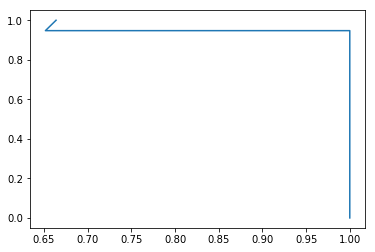

In [135]:
plt.plot(re,pr)

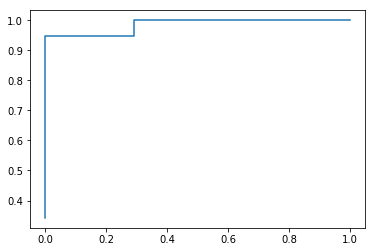

In [136]:
plt.plot(fpr,tpr)

In [131]:
roc_auc = metrics.auc(fpr,tpr, reorder=True)
roc_auc

0.98476454293628812

In [137]:
prc_auc = metrics.auc(pr,re)
prc_auc

0.98198260970848739

In [118]:
true_y.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [119]:
metrics.accuracy_score(true_y_check, y_predicted_pd)

0.9425837320574163

In [120]:
X_test_prep.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Relatives
0,892,3,34.5,0,0,7.8292,0,1,False
1,893,3,47.0,1,0,7.0000,1,0,True
2,894,2,62.0,0,0,9.6875,0,1,False
3,895,3,27.0,0,0,8.6625,0,1,False
4,896,3,22.0,1,1,12.2875,1,0,True


In [121]:
 X_test_prep.PassengerId.head(10)

0    892
1    893
2    894
3    895
4    896
5    897
6    898
7    899
8    900
9    901
Name: PassengerId, dtype: int64

In [66]:
results = pd.DataFrame(list(zip(X_test_prep['PassengerId'], y_predicted_pd['Survived'])), columns=['PassengerId', 'Survived'])

In [122]:
results.to_csv('decision_tree_6_94.csv', index=False, sep=',')